# OpenCV and Image Manipulation

In [0]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import cv2
drive.mount('/content/gdrive', force_remount=True)

# Load Image
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/home.jpg')
type(img)
#Type should be numpy.ndarray, if it is showing as NoneType - the directory is wrong.

Mounted at /content/gdrive


numpy.ndarray

If we want to show the image as a numpy array we can do this by typing img.

In [4]:
img

array([[[134,  69,  41],
        [150,  85,  54],
        [181, 111,  74],
        ...,
        [206, 130,  82],
        [205, 129,  81],
        [205, 129,  81]],

       [[172, 105,  74],
        [179, 110,  77],
        [190, 121,  81],
        ...,
        [206, 130,  82],
        [206, 130,  82],
        [206, 130,  82]],

       [[173, 105,  70],
        [185, 115,  78],
        [189, 121,  76],
        ...,
        [206, 130,  82],
        [206, 130,  82],
        [206, 130,  82]],

       ...,

       [[  3,  50,  42],
        [  0,  41,  35],
        [ 12,  69,  61],
        ...,
        [  8,  60,  42],
        [  6,  58,  41],
        [ 10,  59,  43]],

       [[ 11,  70,  62],
        [ 15,  73,  68],
        [ 12,  69,  66],
        ...,
        [ 18,  72,  55],
        [ 11,  62,  48],
        [  0,  48,  34]],

       [[ 20,  84,  78],
        [  0,  57,  53],
        [ 25,  78,  75],
        ...,
        [ 24,  79,  64],
        [ 11,  61,  49],
        [ 12,  60,  48]]

We can also show this image using MatPlotLib:

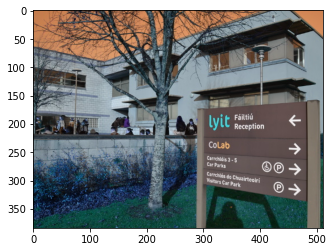

In [5]:
plt.imshow(img)

Why does the imagine look weird? Open CV and MatPlotLib expect different orders in the colour channels. MatPlotLib expects Red[0], Green[1], Blue[2] but OpenCV is providing Blue[0], Green[1], Red[2]. However, we can convert this using OpenCV.

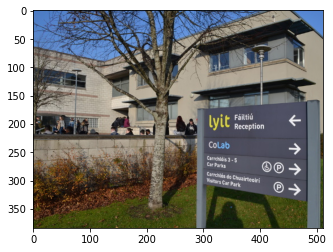

In [6]:
correctimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(correctimg)

In [7]:
correctimg.shape

(384, 512, 3)

The image can also be re-sized (changing the shape).

(700, 1200, 3)

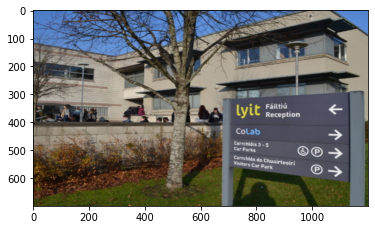

In [8]:
resizedimg = cv2.resize(correctimg,(1200,700)) #width, height
plt.imshow(resizedimg)
resizedimg.shape

(768, 1024, 3)

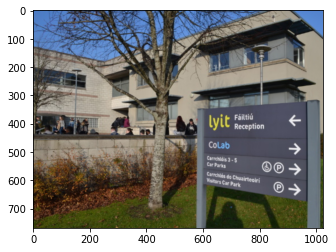

In [9]:
#We can also resize by ratio.
resizedimg = cv2.resize(correctimg,(0,0),correctimg, 2, 2) #Making it double the size of the original
plt.imshow(resizedimg)
resizedimg.shape

If we want to take up more space than the default assigned on the notebook, we can use this code:

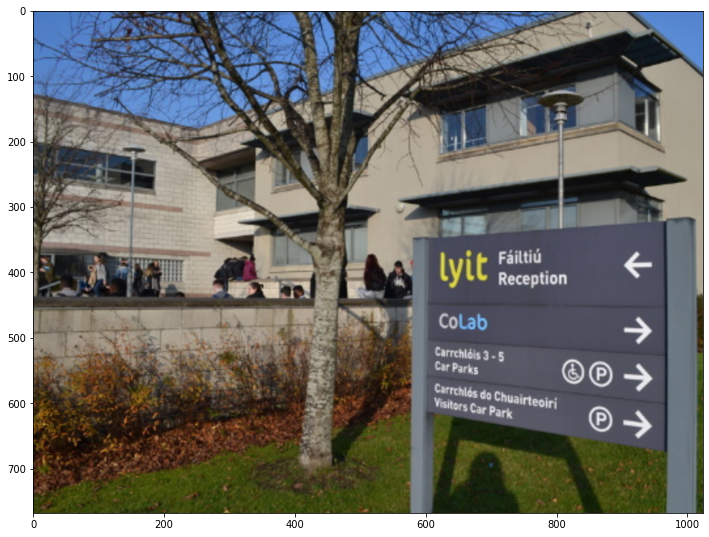

In [10]:
figure = plt.figure(figsize=(12,12))
axis = figure.add_subplot(111) #One Image
axis.imshow(resizedimg)

You can also Flip the image which is useful for pre-processing when augmenting your train/test sample.

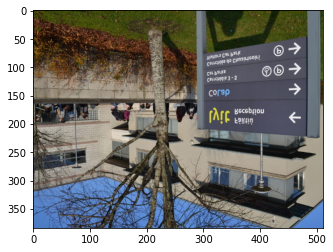

In [11]:
flippedimg = cv2.flip(correctimg,0) #Upside down / flipped horizontally
plt.imshow(flippedimg)

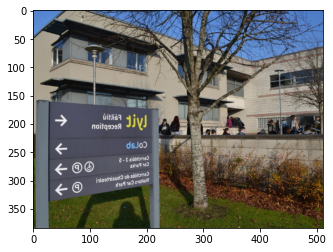

In [12]:
flippedimg = cv2.flip(correctimg,1) #Flipped vertically on the mid point (mirror)
plt.imshow(flippedimg)

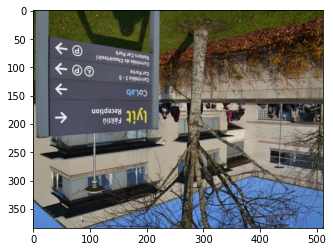

In [13]:
flippedimg = cv2.flip(correctimg,-1) #Both at the same time
plt.imshow(flippedimg)

If we want to save our new images this can be completed using the code below:

In [14]:
cv2.imwrite('/content/gdrive/My Drive/Colab Notebooks/Flipped.jpg', flippedimg)

True

We are using MatPlotLib to display images, it is also possible to use cv2 but we need to apply a workaround to do this using CoLab. See code below for example.

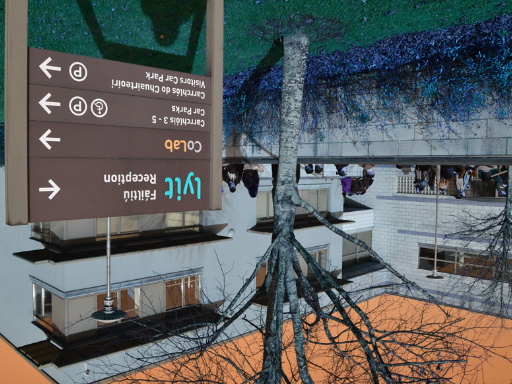

In [15]:
from google.colab.patches import cv2_imshow
cv2_imshow(flippedimg)


# Drawing on Images

In the example below we are downloading an image from the internet and drawing two rectangles to show the fire exits on the building. We are also placing the text "LYIT" on the image. Edit this code to explore different pixel placements. Try moving the "LYIT" text so it appears on the building. Move the rectangles so they appear around the three circle windows.

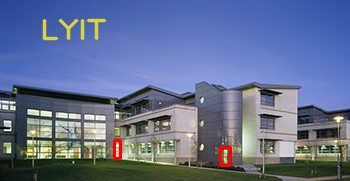

True

In [20]:
!curl -s -o lyit.png https://www.lyit.ie/portals/0/Images/Study%20At%20Lyit/Why-choose-LYIT%20v2.jpg

img = cv2.imread('lyit.png', cv2.IMREAD_UNCHANGED)
cv2.rectangle(img, (114, 140), (120, 158), (0, 0, 255, 255), 2)
cv2.rectangle(img, (220, 147), (230, 165), (0, 0, 255, 255), 2)
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(img,text='LYIT',org=(40,40),fontFace=font,fontScale=2,color=(63,210,218),thickness=2,lineType=cv2.LINE_AA)
cv2_imshow(img)
cv2.imwrite('/content/gdrive/My Drive/Colab Notebooks/LYIT-FireExits.jpg', img)

In the example below we are replacing the "CoLab" logo with new text, we are also drawing a rectangle to cover the current "CoLab" logo. Edit this so you are doing the same with the LYIT logo.

In [25]:
!curl -s -o lyitsign.png https://www.donegaldaily.com/wp-content/uploads/2018/11/DSC_0510.jpg
img = cv2.imread('lyitsign.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
print('Original Image\n\n')
cv2.rectangle(img, (475,360), (545, 385), (93, 78, 76, 255), -1)
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
cv2.putText(img,text='CoLab',org=(483,380),fontFace=font,fontScale=1,color=(63,210,218),thickness=2,lineType=cv2.LINE_AA)
cv2_imshow(img)
print('Edited Image\n\n')
cv2.imwrite('/content/gdrive/My Drive/Colab Notebooks/LYIT-Sign.jpg', img) #Save Image

Output hidden; open in https://colab.research.google.com to view.